In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv('A2Q2Data_train.csv', header=None)

In [ ]:
Data=np.array(df) # Load the data into a numpy array
Y = Data[:, 100:]
X = Data[:, :100]
X = X.T

In [ ]:
def mle(X, Y): # Analytical Solution
  T = X @ X.T
  T = np.linalg.inv(T)
  T = (T @ X) @ Y
  return T

In [ ]:
w_ml = mle(X,Y)
w_ml

In [ ]:
def grad(w, X, Y):
  T = 2*((X @ X.T) @ w) - 2*(X @ Y) # Gradient of the objective function
  return T

In [ ]:
def gradient_descent(X, Y):

  w=np.random.random((100,1)) # Initialize w with a random matrix
  error = np.array([])        # Make an array to store error values
  err_prev=0                  # Variable to maintain previous error value
  err=0                       # Variable to calculate current error value
  it=0                        # Variable to keep track of iterations

  # Error here refers to the distance between w and analytical solution
  # Set a Threshold of 1e-3 between error values as break condition
  while np.abs(err_prev-err) > 1e-3 or it<2:
    err_prev=err
    step_size = (1e-6)                    # Constant Learning rate
    w = w - step_size*grad(w,X,Y)         # Apply gradient descent
    err = np.linalg.norm(w-w_ml)          # Calculate error
    error = np.append(error,err)          # Sppend to the array
    it = it+1                             # Update iterations

  return w, error, it         # Return values of w, it and error

In [ ]:
w_gd, error_gd, it_gd = gradient_descent(X,Y) # Call the GD function
print(it_gd)                                  # Check no of iterations

1000


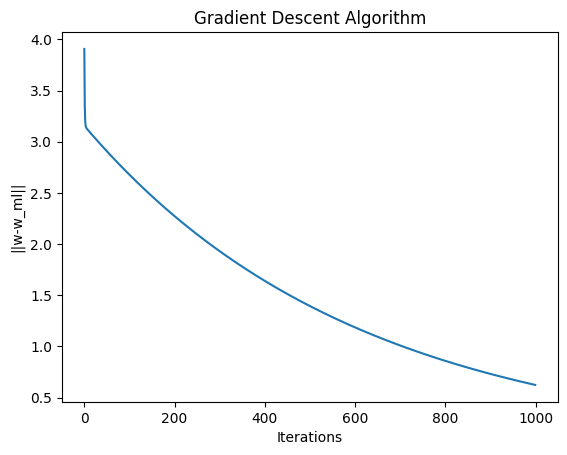

In [ ]:
plt.plot(error_gd)      # Plot the error against number of iterations

plt.title('Gradient Descent Algorithm')
plt.ylabel('||w-w_ml||')
plt.xlabel('Iterations')
plt.show()

In [ ]:
def stochastic_gradient_descent(X,Y,k):   # k here is the batch size

  w=np.random.random((100,1))       # Randomly initialize w
  error = np.array([])              # Declare an array to store error
  err_prev=0                        # Variable to store previous error
  err=0                             # Variable to store current error
  it=0                              # Variable to store iterations

  # Error here is the distance between w and analytical solution
  # Set a Threshold of difference in error values less than 1e-3
  while np.abs(err_prev-err) > 1e-3 or it<2:
    err_prev=err
    step_size = (1e-6)                        # Constant learning rate
    ind = np.random.randint(0,10000,size=k)   # Take a batch of 100 data
    X_sgd = X[:, ind]                         # Create the batch of X
    Y_sgd = Y[ind, :]                         # Create the batch of Y
    w = w - step_size*grad(w,X_sgd,Y_sgd)     # Perform gradient descent
    err = np.linalg.norm(w-w_ml)              # Find error
    error = np.append(error,err)              # Append to the error array
    it = it+1                                 # Update iterations

  return w, error, it               # Return w, it and the error array

In [ ]:
w_sgd, error_sgd, it_sgd = stochastic_gradient_descent(X,Y,100)
print(it_sgd)              # Run the algorithm and print the results

360


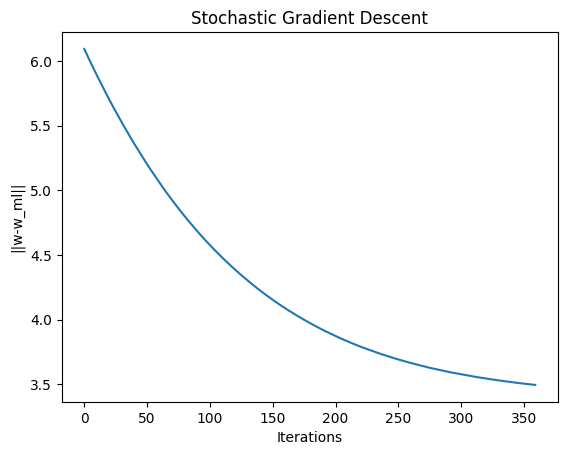

In [ ]:
plt.plot(error_sgd)   # Plot the error values calculated

plt.title('Stochastic Gradient Descent')
plt.ylabel('||w-w_ml||')
plt.xlabel('Iterations')
plt.show()

In [ ]:
def normalize_X(X):
  mean = np.mean(X,axis=1)          # Caluculate mean of the data points
  mean = mean.reshape(100,1)        # Reshape to a column vector
  X = X - mean                      # Center the dataset

  std = 0                           # Calculate Standard Deviation
  for i in range(X.shape[1]):
    std += np.linalg.norm(X[:,i])
  std = std/X.shape[1]
  std = np.sqrt(std)
  X = X/std                         # Bring Devaition of the matrix to 1

  return mean, std, X               # Values of mean and std will be
                                    # required to normalize test data

In [ ]:
mean_x, std_x, X_norm = normalize_X(X)  # Normalize and store values of mean and std
X_norm

In [ ]:
def ridge_grad(w, X, Y, lamda):
  # Calculate gradient of new objective function
  # Lamda being the regularization factor
  T = 2*((X @ X.T) @ w) - 2*(X @ Y) + 2*lamda*w
  return T

In [ ]:
def ridge_regression(X, Y, lamda):

  w=np.random.random((100,1))     # Randomize w
  err_prev=1                      # Variable to store previous error
  err=0                           # Variable to calculate current error
  error = np.array([])

  # Set a Threshold of 1e-3 between successive error values
  # Error here is difference between current w and analytical solution
  while np.abs(err_prev-err) > 1e-3:
    err_prev=err
    step_size = (1e-6)                         # Constant step size
    w = w - step_size*ridge_grad(w,X,Y,lamda)  # Run gradient descent
    err = np.linalg.norm(w-w_ml)               # Calculate error
    error = np.append(error ,err)

  return w, error                  # Return the optimal value found

In [ ]:
def cross_validation(X, Y, lamda):

  # Split the datset into training and cross validation set
  # Put 80% of the data into the training set
  # Rest 20% go into the cross validation set
  X_train = X[:, :8000]
  X_cv = X[:, 8000:]
  Y_train = Y[:8000, :]
  Y_cv = Y[8000:, :]
  error = np.array([])

  for i in range(lamda.shape[0]):
    w, et = ridge_regression(X_train,Y_train,lamda[i])
    w_array = np.array(w)                           # Convert to np array
    e = X_cv.T @ w_array - Y_cv                     # Find error on CV set
    er = np.linalg.norm(e)                          # Find the norm
    error = np.append(error,er)                     # Append to array

  return error

In [ ]:
lamda = np.array([1,5,10,50,100,250,500,750,1000,2500,5000,7500,10000,50000])
error_ridge = cross_validation(X_norm,Y,lamda)

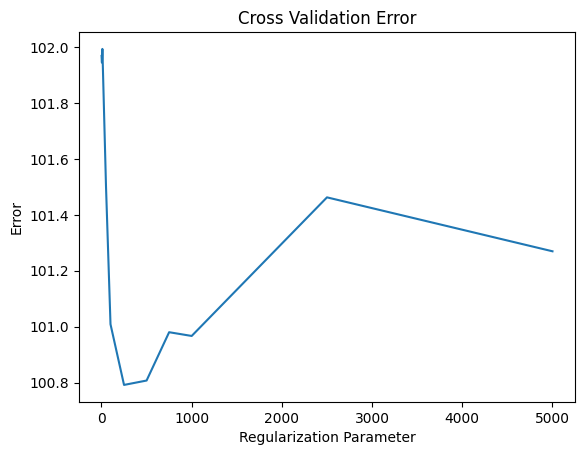

In [ ]:
plt.plot(lamda[:11], error_ridge[:11])

plt.title('Cross Validation Error')
plt.ylabel('Error')
plt.xlabel('Regularization Parameter')
plt.show()

In [ ]:
lamda_opt = lamda[np.argmin(error_ridge)]
w_ridge, error_ridge_opt = ridge_regression(X_norm,Y,lamda_opt)

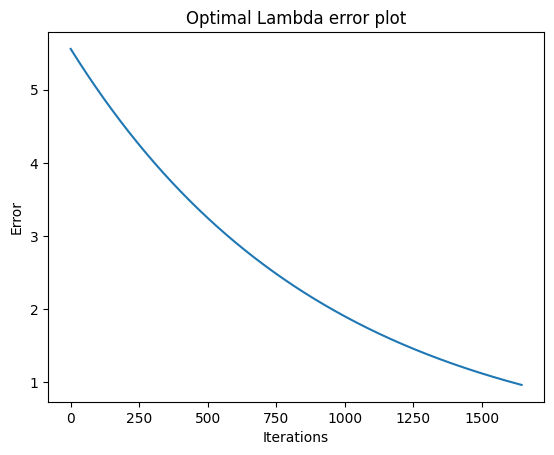

In [ ]:
plt.plot(error_ridge_opt)

plt.title('Optimal Lambda error plot')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

In [ ]:
df_test = pd.read_csv('A2Q2Data_test.csv', header=None)
df_test

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.21302,0.446210,0.51432,0.219750,0.495440,0.463670,0.26007,0.28137,0.983820,0.00777,...,0.92910,0.286690,0.45841,0.788740,0.041794,0.58736,0.904910,0.91718,0.68321,2.0121
1,0.32563,0.703990,0.31970,0.045240,0.869680,0.131360,0.47664,0.26632,0.334520,0.81200,...,0.51868,0.255460,0.29498,0.008869,0.169970,0.92325,0.421340,0.90906,0.61539,1.8164
2,0.49539,0.623570,0.58121,0.879160,0.930960,0.203040,0.35752,0.31232,0.066225,0.46389,...,0.85782,0.505300,0.32361,0.693090,0.690430,0.01604,0.467410,0.67303,0.60459,1.6435
3,0.88875,0.013187,0.87982,0.858160,0.793920,0.792390,0.76522,0.85145,0.233610,0.57924,...,0.25535,0.383410,0.55130,0.727730,0.676890,0.84605,0.611160,0.58514,0.41724,2.7451
4,0.15178,0.540760,0.26896,0.006752,0.101020,0.342080,0.86855,0.32698,0.285460,0.80503,...,0.54955,0.129320,0.94848,0.326100,0.268010,0.27125,0.535350,0.91872,0.16801,1.8932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.10578,0.870530,0.66376,0.570310,0.691110,0.065131,0.25840,0.56343,0.958840,0.75578,...,0.73314,0.947650,0.41785,0.450240,0.226930,0.12547,0.506790,0.60808,0.61612,2.2680
496,0.36756,0.673490,0.54089,0.932350,0.037031,0.806840,0.50789,0.27116,0.879440,0.57790,...,0.75535,0.067279,0.97832,0.759940,0.991350,0.80861,0.716250,0.43949,0.79699,2.8274
497,0.24582,0.320620,0.79933,0.743320,0.314150,0.713150,0.90045,0.67816,0.392680,0.96917,...,0.59358,0.711090,0.45839,0.434920,0.464740,0.69551,0.447860,0.78741,0.11548,2.8058
498,0.31768,0.937750,0.91269,0.840630,0.301710,0.600530,0.59427,0.10969,0.438170,0.39921,...,0.58933,0.892750,0.70348,0.715340,0.198450,0.31288,0.099705,0.82134,0.71902,2.2495


In [ ]:
Data_test=np.array(df_test)   # Load the Test data into an array
Y_test = Data_test[:, 100:]   # Separate the labels from the set
X_test = Data_test[:, :100]   # Separate the feature labels
X_test = X_test.T

In [ ]:
X_test = X_test - mean_x      # Normalize the test data
X_test = X_test/std_x

In [ ]:
def mse(X, Y, w):             # function to find objective function
  err = X.T @ w - Y
  return np.linalg.norm(err)

In [ ]:
err_w_ml = mse(X_test, Y_test, w_ml)   # Objective function with w=w_ml
err_w_r = mse(X_test, Y_test, w_ridge) # Objective function with w=w_ridge
print(err_w_ml)                        # Print the 2 values
print(err_w_r)

51.018747109394674
50.7702112368051
